<a href="https://colab.research.google.com/github/davidrtorres/ML_Image_Processing/blob/main/Image_Classification_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using Machine Learning for Image Classification in Python
In this notebook I'm going to build a Machine Learning model for image classification.  This is a binary classification problem.  I going to build models to predict whether an image is of a car or airplane.<br>
What is the difference between image segmentation and image classification?  By segmentation I am referring to semantic segmentation.  Image segmentation refers to every pixel classification.  Image classification refers to the entire picture classified as something, i.e. is this an image of an infected or non-infected cell.  Here we're not dealing with pixel level information.  We're dealing with whole image level information, i.e., is this an airplane or a car.  The entire image is classifed into one or the categories.  

I followed the Youtube Series https://www.youtube.com/watch?v=nK-2k_ENgEc&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=85 in prepaing this notebook.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import cv2
import os

### Put Image Folders into Train, Validation and Test Sets
The image folder consists of 2 subfolders for airplanes and cars.  The task for this section was how to take the subfolders and split then into train, validation and test sets.  I need train and validation sets so that labels can be created. 

In [2]:
!pip install split-folders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import splitfolders

The train set is used to train the model and to update the weights.  The validation data is used as part of the training but only to validate after each iteration.  Test data is never used as part of the training process.

https://www.youtube.com/watch?v=C6wbr1jJvVs

In [4]:
# input_folder = '/content/drive/MyDrive/datasets/air_car3/'
# # #testing, (20)validation, (test)testing
# splitfolders.ratio(input_folder, output='/content/drive/MyDrive/datasets/air_car4_folder/',seed=42, ratio=(.7,.3,.0),group_prefix=None) #ratio=(.7,.2,.1)

In [5]:
print(os.listdir('/content/drive/MyDrive/datasets/air_car4_folder/'))

['train', 'val', 'test']


In [6]:
# file = '/content/drive/MyDrive/datasets/cell_images_folder/train/'
# for f in glob.glob(file + "/*.JPG"):
#   print(f)

### Read the Images
The for loop iterates through every image in the train folder.  I ran the for loop on the train folder and the directory shows that there are 2 subfolders (airplane and car) in the train folder.  With the function .split() I created a label for each image based on the folder it's in. 
When you load the images they usually come in different sizes so I resized the images so they're all one size for processing purposes.  

In [7]:
SIZE = 128
train_images = []
train_labels=[]

for directory_path in glob.glob("/content/drive/MyDrive/datasets/air_car4_folder/train/*"):#"/content/drive/MyDrive/datasets/air_car2_folder/train/*"
  #create label
  label = directory_path.split("/")[-1]
  print(label)
  #print(directory_path)
  for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    #print(img_path)
    #read image as color meaning 3 channels
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    #resize images
    img = cv2.resize(img, (SIZE,SIZE))
    #append images
    train_images.append(img)
    train_labels.append(label)
#convert list to numpy array
train_images = np.array(train_images)
train_labels  = np.array(train_labels)

cats
car
airplane


In [8]:
from google.colab.patches import cv2_imshow

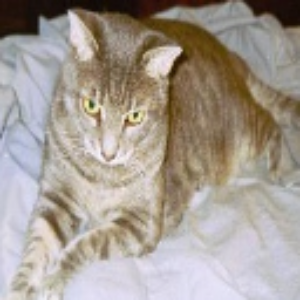

In [9]:
img = cv2.resize(train_images[3], (300,300))
#plt.title('Image of Car')
cv2_imshow(img)

In [10]:
train_images

array([[[[  1,  24,  18],
         [ 14,  43,  36],
         [ 20,  44,  37],
         ...,
         [215, 230, 241],
         [215, 230, 242],
         [213, 229, 241]],

        [[  8,  30,  22],
         [ 28,  52,  45],
         [ 32,  54,  46],
         ...,
         [216, 229, 241],
         [214, 227, 239],
         [210, 224, 236]],

        [[ 38,  53,  42],
         [ 54,  72,  60],
         [ 59,  81,  67],
         ...,
         [216, 228, 240],
         [216, 227, 239],
         [213, 225, 237]],

        ...,

        [[ 70,  86, 111],
         [105, 119, 143],
         [126, 135, 159],
         ...,
         [110, 130, 165],
         [ 93, 112, 144],
         [ 54,  73, 104]],

        [[ 58,  77,  99],
         [ 69,  85, 108],
         [105, 116, 140],
         ...,
         [ 74,  91, 125],
         [ 55,  70, 102],
         [ 51,  67,  96]],

        [[ 58,  81, 100],
         [ 58,  76,  98],
         [ 78,  91, 114],
         ...,
         [ 55,  71, 104],
        

In [11]:
train_labels

array(['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'airplane', 'airplane',
       'airplane', 'airplane', 'airplane', 'airplane', 'airplane',
       'airplane', 'airplane', 'airplane', 'airplane', 'airplane',
       'airplane', 'airplane', 'airplane', 'airplane', 'airplane'],
      dtype='<U8')

In [12]:
print(train_images.shape)
print(train_labels.shape)

(48, 128, 128, 3)
(48,)


In [13]:
test_images = []
test_labels=[]

for directory_path in glob.glob("/content/drive/MyDrive/datasets/air_car4_folder/val/*"):#/content/drive/MyDrive/datasets/air_car2_folder/val/*
  flower_label = directory_path.split("/")[-1]
  print(flower_label)
  #print(directory_path)
  for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    #print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (SIZE,SIZE))

    test_images.append(img)
    test_labels.append(flower_label)

test_images = np.array(test_images)
test_labels  = np.array(test_labels)

cats
car
airplane


In [14]:
print(test_images.shape)
print(test_labels.shape)

(20, 128, 128, 3)
(20,)


In [15]:
test_labels

array(['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'airplane', 'airplane',
       'airplane', 'airplane', 'airplane', 'airplane', 'airplane'],
      dtype='<U8')

### Preprocessing
The label has the categories airplane, car and cat which are objects and need to be converted to the numeric types 0,1,2.  For this task I used the label encoder. 

In [16]:
from sklearn import preprocessing

In [17]:
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [18]:
train_labels_encoded

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

### Split the Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, y_train, X_test,y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

### Normal the Data
I normalized the data so all the values would be between 0 and 1.

In [21]:
X_train, X_test = X_train / 255.0, X_test/255.0

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48, 128, 128, 3)
(48,)
(20, 128, 128, 3)
(20,)


### Feature Extraction
I'm using Gabor filters for feature extraction.  The function feature_extraction enables me to go through each image and apply filter and operations.  First, I added the pixels values of the images into a dataframe.  
Next, I used Gabor filters to extract features. The Gabor filter function generates a kernel. The kernel is then applied to each image and responses/features are generated and extracted from the image.  The responses are then added to the dataframe df which contains the pixel values. We will extract features from the images by applying filters to them.  The dataframe will then be used as input for the machine learning algorithm for training purposes.<br>


In [23]:
from skimage.filters import roberts,sobel, scharr, prewitt

In [24]:
def feature_extractor(dataset):
    X_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(X_train.shape[0]):

        df = pd.DataFrame()

        input_img = X_train[image,:,:,:]
        img = input_img

        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values
        #Generate Gabor filters
        num=1
        kernels = []
        for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with values of 1 and 3
                for lamda in np.arange(0, np.pi, np.pi / 4): #lamda =  np.pi /4   #Range of wavelengths
                    for gamma in (0.05, 0.5): #gamma = 0.5   #Gamma values of 0.05 and 0.5
                           
                      gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
                      #print(gabor_label)
                      #kernal size
                      ksize=9
                      #generate a Gabor kernal with each parameter 
                      kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                      kernels.append(kernel)
                      #apply kernal to image/filter the image and add values to a new column
                      #when you get kernal apply it to image2
                      #the filtered image is 2D 
                      fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                      #reshape filtered image/fimg to 1D
                      filtered_img = fimg.reshape(-1)
                      #add new column to dataframe
                      df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                      #print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                      num += 1  #Increment for gabor column label

        # edges = cv2.Canny(img, 100,200) #minimum and max value
        # edges1 = edges.reshape(-1)
        # df['Canny_Edge'] = edges1
        # edge_roberts = roberts(img) #minimum and max value
        # edge_roberts1 = edge_roberts.reshape(-1)
        # df['Roberts'] = edge_roberts1

        edge_sobel = sobel(img) #minimum and max value
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1

        edge_scharr = scharr(img) #minimum and max value
        edge_scharr1 = edge_scharr.reshape(-1)
        df['Scharr'] = edge_scharr1 

        image_dataset = image_dataset.append(df)
    return image_dataset
 

With this function I'm going to extract images from the training set.

In [25]:
image_features = feature_extractor(X_train)

In [26]:
image_features.head()

,Pixel_Value,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32,Sobel,Scharr
0,0.003922,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.067926,0.066553
1,0.094118,0,0,1,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0.059335,0.059198
2,0.070588,0,0,1,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0.048078,0.047097
3,0.054902,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0.077919,0.079325
4,0.168627,0,0,1,1,1,0,0,0,0,...,0,0,2,2,0,0,0,0,0.066045,0.067028


In [27]:
image_features.columns

Index(['Pixel_Value', 'Gabor1', 'Gabor2', 'Gabor3', 'Gabor4', 'Gabor5',
       'Gabor6', 'Gabor7', 'Gabor8', 'Gabor9', 'Gabor10', 'Gabor11', 'Gabor12',
       'Gabor13', 'Gabor14', 'Gabor15', 'Gabor16', 'Gabor17', 'Gabor18',
       'Gabor19', 'Gabor20', 'Gabor21', 'Gabor22', 'Gabor23', 'Gabor24',
       'Gabor25', 'Gabor26', 'Gabor27', 'Gabor28', 'Gabor29', 'Gabor30',
       'Gabor31', 'Gabor32', 'Sobel', 'Scharr'],
      dtype='object')

The image_features dataframe consists of 1,376,256 rows/pixel values and 5 columns.

In [28]:
image_features.shape

(2359296, 35)

In [29]:
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (X_train.shape[0],-1))

In [30]:
from sklearn.ensemble import RandomForestClassifier

## Models
### Random Forest Classifier

In [31]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [32]:
#train prediction
train_features = feature_extractor(X_train)
train_features = np.expand_dims(train_features, axis=0)
train_for_RF = np.reshape(train_features, (X_train.shape[0],-1))

In [33]:
#mine prediction
train_prediction = rf_model.predict(train_for_RF)
train_prediction = le.inverse_transform(train_prediction)

In [34]:
test_features = feature_extractor(X_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (X_test.shape[0],-1))

In [35]:
test_prediction = rf_model.predict(test_for_RF)
test_prediction = le.inverse_transform(test_prediction)

#### Support Vector Machine 

In [36]:
#from sklearn import svm
from sklearn.svm import LinearSVC

In [37]:
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_svm = np.reshape(image_features, (X_train.shape[0],-1))

In [38]:


model_svm = LinearSVC(max_iter=400)
model_svm.fit(X_for_svm, y_train)

# svm_model = svm.SVC(decision_function_shape='ovo')
# svm_model.fit(X_for_svm, y_train)
#prediction_svm = model_svm.predict(X_test)
# print("Train Accuracy: ", metrics.accuracy_score(y_train, y_train_pred)) 
# #make a prediction

#how good was model at making prediction? Accuracy of prediction 
#print('Test Accuracy: ',metrics.accuracy_score(y_test, prediction_svm))

LinearSVC(max_iter=400)

In [39]:
test_features_svm = feature_extractor(X_test)
test_features_svm = np.expand_dims(test_features_svm, axis=0)
test_for_svm = np.reshape(test_features_svm, (X_test.shape[0],-1))

In [40]:
test_prediction_svm = model_svm.predict(test_for_svm)
test_prediction_svm = le.inverse_transform(test_prediction_svm)

### Metrics

In [41]:
from sklearn import metrics

In [42]:
acc = metrics.accuracy_score(train_labels, train_prediction)
test_acc = metrics.accuracy_score(test_labels, test_prediction)
print('Accuracy for rf_model')
print('Train Accuracy: {:.3f}'.format(acc))
print('RFC Test Accuracy: {:.3f}'.format(test_acc))

Accuracy for rf_model
Train Accuracy: 1.000
RFC Test Accuracy: 0.950


In [43]:
test_acc_svm = metrics.accuracy_score(test_labels, test_prediction_svm)
print('Accuracy for svm_model')
#print('Train Accuracy: {:.3f}'.format(acc))
print('SVM Test Accuracy: {:.3f}'.format(test_acc_svm))

Accuracy for svm_model
SVM Test Accuracy: 0.900


In [44]:
names = ['Pixel_Value', 'Gabor1', 'Gabor2', 'Gabor3', 'Gabor4', 'Gabor5',
       'Gabor6', 'Gabor7', 'Gabor8', 'Gabor9', 'Gabor10', 'Gabor11', 'Gabor12',
       'Gabor13', 'Gabor14', 'Gabor15', 'Gabor16', 'Gabor17', 'Gabor18',
       'Gabor19', 'Gabor20', 'Gabor21', 'Gabor22', 'Gabor23', 'Gabor24',
       'Gabor25', 'Gabor26', 'Gabor27', 'Gabor28', 'Gabor29', 'Gabor30',
       'Gabor31', 'Gabor32', 'Sobel', 'Scharr']

In [45]:
# importances = list(rf_model.feature_importances_)
# #features_list = list(image_features.columns)
# feature_imp = pd.Series(rf_model.feature_importances_, index= names).sort_values(ascending=False) #features_list

In [46]:
#feature_imp.plot(kind='barh', figsize=(8,6));

#### Confusion Matrix



In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


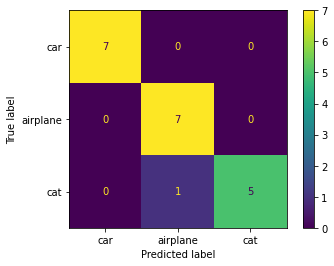

In [48]:
cm = confusion_matrix(test_labels, test_prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['car','airplane', 'cat'])
cmd.plot()

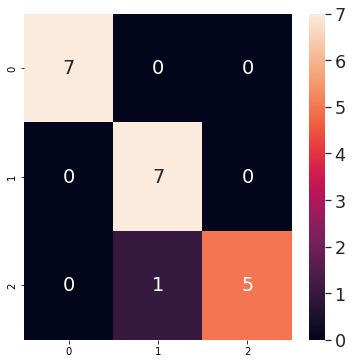

In [49]:
fig,ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

#### Classification Report for RFC

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels, test_prediction))

              precision    recall  f1-score   support

    airplane       1.00      1.00      1.00         7
         car       0.88      1.00      0.93         7
        cats       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.96      0.95      0.95        20



### Check Results with Random Images
Check the results on test images to see where it was correct and where it failed.<br>
Want to generate a random number between 0 and the number of images in train set.  Then show the image.

In [51]:
import random

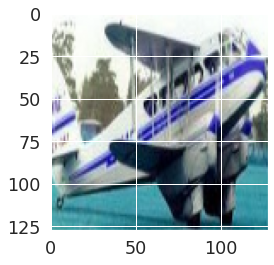

In [52]:
n = random.randint(0, X_test.shape[0]-1)
img = X_test[n]
plt.imshow(img)

In [53]:
input_img = np.expand_dims(img, axis=0)
input_img_features = feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0],-1)) 
#predict
img_prediction = rf_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform(img_prediction)
print('The prediction for this image is: ',img_prediction)
print('Actual Label for this image is: ', test_labels[n])

The prediction for this image is:  ['airplane']
Actual Label for this image is:  airplane


### Findings
I originally only used 15 images.  I created a Random Forest Classifier and on the test set got an accuracy score of 75%.  I increased the dataset to 28 images.  With the Random Forest Classifier the accuracy increased to 91%.  I also created an SVM model and I got the same accuracy score of 91% 